# Exploratory data analysis of Global alcohol consumption.
The data shows different forms in which the Alcohol is consumed across 189 countries for the year 2016 collected by WHO. It contains information on total Alcohol consumed, percentage of it consumed as beer, wine, spirits and other uses respectively. Additionaly, it also contains information on consumption that was unrecorded hinting towards existence of illegal sales.


## Data Preparation and Cleaning

We first look at the raw data and try to figure out is there are any null values, duplicate rows or wrong values. Next,we attain some very basic information about the data



In [ ]:
import pandas as pd

In [ ]:
Alcohol_Raw_df = pd.read_csv('alcohol-consumption.csv')
Alcohol_Raw_df

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6
...,...,...,...,...,...,...,...,...,...,...
184,Bangladesh,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
185,Kuwait,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
186,Libya,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
187,Mauritania,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
Alcohol_Raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 189 non-null    object 
 1   total_consumption       189 non-null    float64
 2   recorded_consumption    189 non-null    float64
 3   unrecorded_consumption  189 non-null    float64
 4   beer_percentage         179 non-null    float64
 5   wine_percentage         179 non-null    float64
 6   spirits_percentage      179 non-null    float64
 7   other_percentage        179 non-null    float64
 8   2020_projection         189 non-null    float64
 9   2025_projection         189 non-null    float64
dtypes: float64(9), object(1)
memory usage: 14.9+ KB


In [ ]:
Alcohol_Raw_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
184    False
185    False
186    False
187    False
188    False
Length: 189, dtype: bool

In [ ]:
Alcohol_Raw_df.drop_duplicates(inplace = True)
Alcohol_df= Alcohol_Raw_df.dropna() #Dropping Values because Mean, Median or Mode cannot be used due to different cultural factors
Alcohol_df

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6
...,...,...,...,...,...,...,...,...,...,...
176,Egypt,0.4,0.2,0.2,62.0,4.4,33.1,0.6,0.4,0.5
177,Iraq,0.4,0.2,0.2,71.0,2.4,25.7,0.9,0.5,0.6
178,Kiribati,0.4,0.4,0.2,100.0,0.0,0.0,0.0,0.4,0.4
180,Syria,0.3,0.2,0.1,11.6,1.1,87.2,0.0,0.3,0.3


In [ ]:
Alcohol_df.describe()

,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,6.516760,5.197765,1.444693,43.484358,16.306704,29.394413,10.807821,6.592737,6.802235
std,3.981989,3.689995,0.868495,22.147305,18.123067,24.027063,23.013580,3.945343,4.013292
min,0.100000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,2.900000,1.650000,0.900000,28.300000,2.150000,10.850000,0.000000,3.150000,3.250000
50%,6.600000,4.900000,1.400000,39.900000,8.500000,25.400000,0.700000,7.000000,7.000000
75%,9.700000,8.250000,1.800000,56.900000,27.950000,43.750000,4.650000,9.850000,10.300000
max,16.900000,15.800000,5.300000,100.000000,84.700000,97.300000,94.900000,16.200000,18.300000


In [ ]:
total_consumption_df = Alcohol_df[['country', 'total_consumption']]
total_consumption_df 

,country,total_consumption
0,Estonia,16.9
1,Lithuania,15.0
2,Czech Republic,14.3
3,Seychelles,13.8
4,Germany,13.4
...,...,...
176,Egypt,0.4
177,Iraq,0.4
178,Kiribati,0.4
180,Syria,0.3


In [ ]:
Sorted_consumption_df = total_consumption_df.sort_values(by = "total_consumption")
Sorted_consumption_df

,country,total_consumption
183,Yemen,0.1
180,Syria,0.3
177,Iraq,0.4
175,Brunei,0.4
178,Kiribati,0.4
...,...,...
4,Germany,13.4
3,Seychelles,13.8
2,Czech Republic,14.3
1,Lithuania,15.0


In [ ]:
Spirits_consumption = []
for values in Alcohol_df['spirits_percentage']:
    Spirits_consumption = ((Alcohol_df['total_consumption']*Alcohol_df['spirits_percentage'])/100)
Alcohol_df['spirits_consumption'] = list(Spirits_consumption)

/tmp/ipykernel_499/722011737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alcohol_df['spirits_consumption'] = list(Spirits_consumption)


In [ ]:
Beer_consumption = []
for values in Alcohol_df['beer_percentage']:
    Beer_consumption = ((Alcohol_df['total_consumption']*Alcohol_df['beer_percentage'])/100)
Alcohol_df['beer_consumption'] = list(Beer_consumption)


/tmp/ipykernel_499/2274487578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alcohol_df['beer_consumption'] = list(Beer_consumption)


In [ ]:
Wine_consumption = []
for values in Alcohol_df['wine_percentage']:
    Wine_consumption = ((Alcohol_df['total_consumption']*Alcohol_df['wine_percentage'])/100)
                        
Alcohol_df['wine_consumption'] = list(Wine_consumption) 


/tmp/ipykernel_499/1205324259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alcohol_df['wine_consumption'] = list(Wine_consumption)


In [ ]:
Other_consumption = []
for values in Alcohol_df['other_percentage']:
    Other_consumption = ((Alcohol_df['total_consumption']*Alcohol_df['other_percentage'])/100)
                        
Alcohol_df['other_consumption'] = list(Other_consumption) 


/tmp/ipykernel_499/26083591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alcohol_df['other_consumption'] = list(Other_consumption)


In [ ]:
Beverage_consumption = []
for index in Alcohol_df.index:
    Beverage_consumption = (Alcohol_df['beer_consumption']+Alcohol_df['wine_consumption'])
                        
Alcohol_df['beverage_consumption'] = list(Beverage_consumption) 
Alcohol_df

/tmp/ipykernel_499/260319537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alcohol_df['beverage_consumption'] = list(Beverage_consumption)


,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection,spirits_consumption,beer_consumption,wine_consumption,other_consumption,beverage_consumption
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9,8.5007,5.5263,1.2506,1.6224,6.7769
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9,5.5650,6.5400,1.0950,1.8150,7.6350
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4,3.6322,7.6219,3.0459,0.0000,10.6678
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6,0.8694,9.5082,3.0912,0.3450,12.5994
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6,2.5326,7.0484,3.8056,0.0000,10.8540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Egypt,0.4,0.2,0.2,62.0,4.4,33.1,0.6,0.4,0.5,0.1324,0.2480,0.0176,0.0024,0.2656
177,Iraq,0.4,0.2,0.2,71.0,2.4,25.7,0.9,0.5,0.6,0.1028,0.2840,0.0096,0.0036,0.2936
178,Kiribati,0.4,0.4,0.2,100.0,0.0,0.0,0.0,0.4,0.4,0.0000,0.4000,0.0000,0.0000,0.4000
180,Syria,0.3,0.2,0.1,11.6,1.1,87.2,0.0,0.3,0.3,0.2616,0.0348,0.0033,0.0000,0.0381


## Exploratory Analysis and Visualization

In this segment, data is presented in terms of various graphs using the Matplotlib Library. Furthermore, Numpy is used to ascertain parameters of the data to further analyse it 



In [ ]:
import numpy as np
Alcohol_df['total_consumption'].describe()

count    179.000000
mean       6.516760
std        3.981989
min        0.100000
25%        2.900000
50%        6.600000
75%        9.700000
max       16.900000
Name: total_consumption, dtype: float64

Let's begin by importing`matplotlib.pyplot` and `seaborn`.


In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (14, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000012'

We look at the total alcohol consumption of 10 countries with highest consumption


In [ ]:
top_consuming_countries = Sorted_consumption_df.tail(10)
top_consuming_countries

,country,total_consumption
9,Bulgaria,12.7
8,Latvia,12.9
7,Moldova,13.0
6,Ireland,13.0
5,Nigeria,13.4
4,Germany,13.4
3,Seychelles,13.8
2,Czech Republic,14.3
1,Lithuania,15.0
0,Estonia,16.9


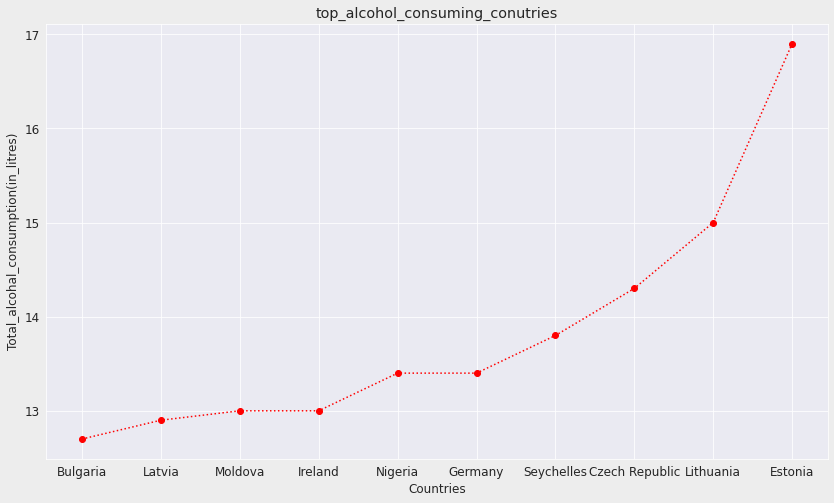

In [ ]:
plt.xlabel('Countries')
plt.ylabel('Total_alcohal_consumption(in_litres)')
plt.title("top_alcohol_consuming_conutries")
plt.plot(top_consuming_countries.country, top_consuming_countries.total_consumption,"o:r")
plt.show()

The graph above represents the top 10 countries by their total alcohol consumption. 8 out of the 10 countries that consume most alcohol are European

In [ ]:
Countries_with_low_consumption = Sorted_consumption_df.head(10)
Countries_with_low_consumption

,country,total_consumption
183,Yemen,0.1
180,Syria,0.3
177,Iraq,0.4
175,Brunei,0.4
178,Kiribati,0.4
176,Egypt,0.4
173,Niger,0.5
172,Djibouti,0.5
171,Morocco,0.6
170,Bhutan,0.6


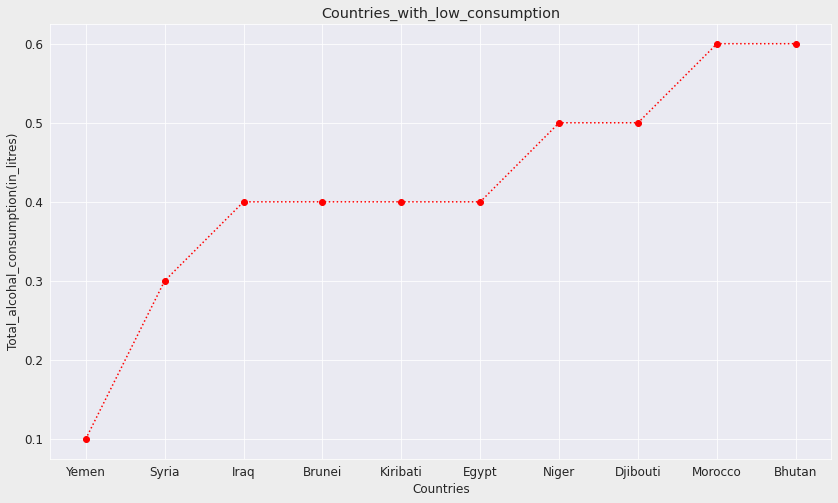

In [ ]:
plt.xlabel('Countries')
plt.ylabel('Total_alcohal_consumption(in_litres)')
plt.title("Countries_with_low_consumption")
plt.plot(Countries_with_low_consumption.country, Countries_with_low_consumption.total_consumption,"o:r")
plt.show()

The graph above represent lowest 10 countries by their total alcohol consumption. Countries with lowest consumption are those with Islam as their official religion. 
This is consistent with the idea that cultural and religious practices greatly influences consumption patterns.

At the same time, the variance as can be inferred by the graphs is lower for countries with lower consumption than countries with higher consumption. 

In [ ]:
Alcohol_df

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection,spirits_consumption,beer_consumption,wine_consumption,other_consumption,beverage_consumption
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9,8.5007,5.5263,1.2506,1.6224,6.7769
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9,5.5650,6.5400,1.0950,1.8150,7.6350
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4,3.6322,7.6219,3.0459,0.0000,10.6678
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6,0.8694,9.5082,3.0912,0.3450,12.5994
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6,2.5326,7.0484,3.8056,0.0000,10.8540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Egypt,0.4,0.2,0.2,62.0,4.4,33.1,0.6,0.4,0.5,0.1324,0.2480,0.0176,0.0024,0.2656
177,Iraq,0.4,0.2,0.2,71.0,2.4,25.7,0.9,0.5,0.6,0.1028,0.2840,0.0096,0.0036,0.2936
178,Kiribati,0.4,0.4,0.2,100.0,0.0,0.0,0.0,0.4,0.4,0.0000,0.4000,0.0000,0.0000,0.4000
180,Syria,0.3,0.2,0.1,11.6,1.1,87.2,0.0,0.3,0.3,0.2616,0.0348,0.0033,0.0000,0.0381


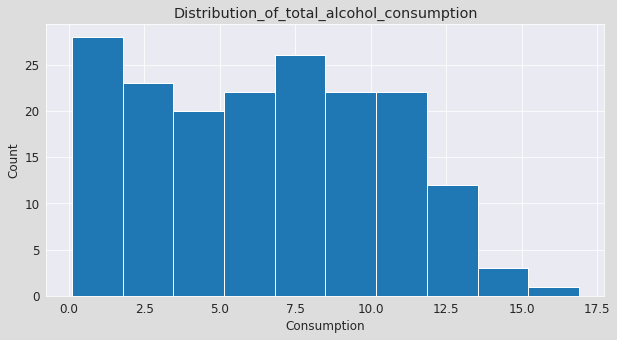

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000022'
plt.ylabel('Count')
plt.xlabel('Consumption')
plt.title('Distribution_of_total_alcohol_consumption')
plt.hist(Alcohol_df.total_consumption)
plt.show()

The histogram shows distribution of alcohol consumption across countries. The X axis shows the amount of alcohol consumption (as range) while the Y axis shows the no of countries that fall under that interval. 

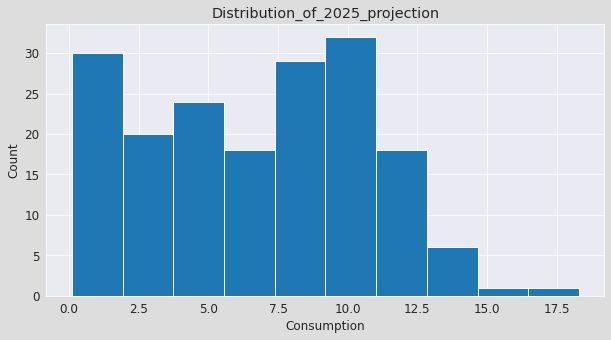

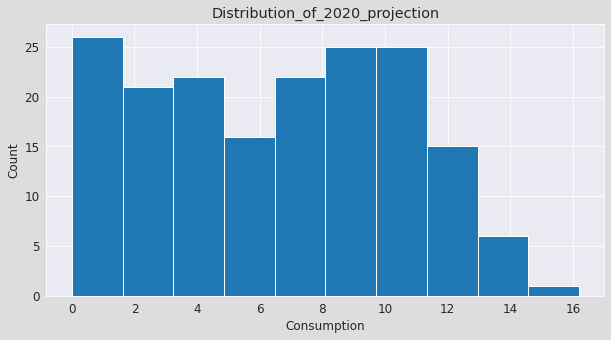

In [ ]:
plt.ylabel('Count')
plt.xlabel('Consumption')
plt.title('Distribution_of_2025_projection')
plt.hist(Alcohol_df['2025_projection'])
plt.show()

plt.ylabel('Count')
plt.xlabel('Consumption')
plt.title('Distribution_of_2020_projection')
plt.hist(Alcohol_df['2020_projection'])
plt.show()

In the above segment, Distribution of the total_consumption in 2016 and predictions in the year 2020 and 2025 are shown using histograms. While the countries consuming lesser alcohol seems to not projected to change much in 2020, its projected to increase in 2025.
At the same time lesser countries fall on extreme right. 
variation in Alcohol consumption slightly increases in 2025

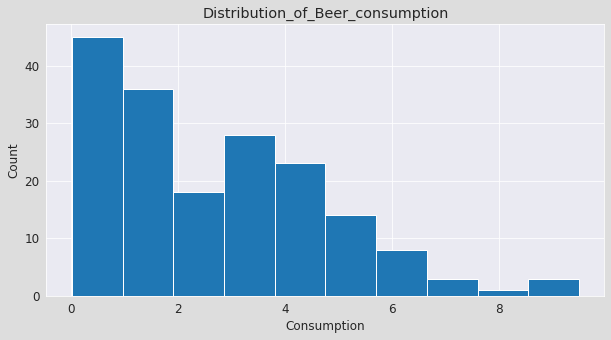

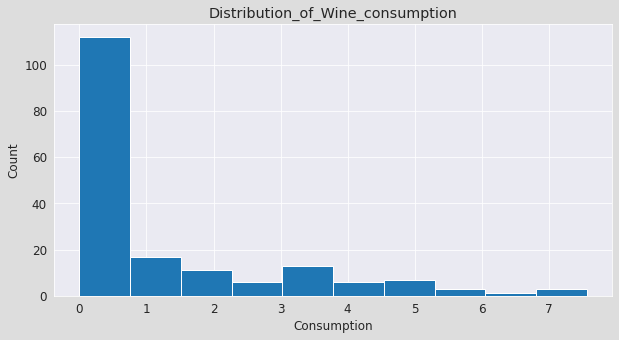

In [ ]:
plt.ylabel('Count')
plt.xlabel('Consumption')
plt.title('Distribution_of_Beer_consumption')
plt.hist(Alcohol_df['beer_consumption'])
plt.show()

plt.ylabel('Count')
plt.xlabel('Consumption')
plt.title('Distribution_of_Wine_consumption')
plt.hist(Alcohol_df['wine_consumption'])
plt.show()

The two histograms compare patterns of beer and wine consumption respectively. Preference for wine varies more across countries compared to Beer. It could be inferred that countries fewer countries consume wine as compared to beer.  

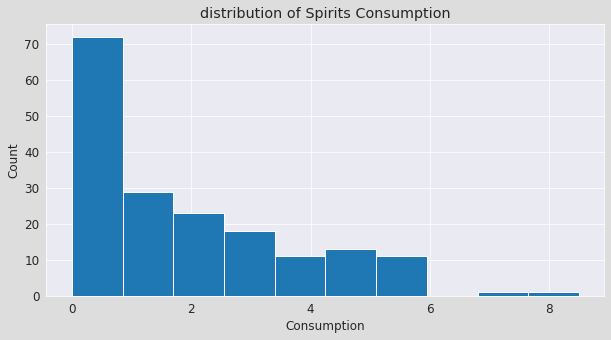

In [ ]:
plt.title('distribution of Spirits Consumption')
plt.ylabel('Count')
plt.xlabel('Consumption')
plt.hist(Alcohol_df['spirits_consumption'])
plt.show()

The consumption of spirits ranges from 0 to 8 litres. Most countries fall in the consumption range of 0-2

In [ ]:
print(np.sum(Alcohol_df['total_consumption']))
print(np.mean(Alcohol_df['total_consumption']))

1166.5
6.516759776536314


In [ ]:
print(np.sum(Alcohol_df['2025_projection']))
print(np.mean(Alcohol_df['2025_projection']))

1217.6
6.8022346368715025


<AxesSubplot:title={'center':'Beer and Spirits consumption'}, xlabel='spirits_percentage', ylabel='beer_percentage'>

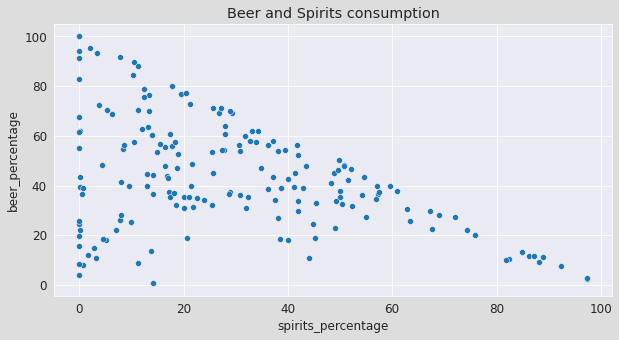

In [ ]:
plt.title("Beer and Spirits consumption")
sns.scatterplot(x = Alcohol_df.spirits_percentage, y = Alcohol_df.beer_percentage)

<AxesSubplot:title={'center':'Spirits and Wine consumption'}, xlabel='spirits_percentage', ylabel='wine_percentage'>

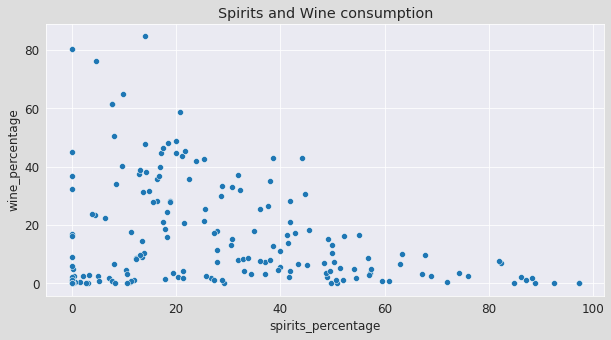

In [ ]:
plt.title("Spirits and Wine consumption")
sns.scatterplot(x = Alcohol_df.spirits_percentage, y = Alcohol_df.wine_percentage)

From the figure above, I try to see if there is any relationship between percentages of beer and spirits consumed  as well as percentages of wine and spirits consumed. The graph depicts a weak negative relationship between beer and spirits consumption. 

In [ ]:
Alcohol_df.spirits_percentage

0      50.3
1      37.1
2      25.4
3       6.3
4      18.9
       ... 
176    33.1
177    25.7
178     0.0
180    87.2
183    10.5
Name: spirits_percentage, Length: 179, dtype: float64

#### Q1: - What is the distribution of Consumption in Oman compared to Ireland? (Any group of countries can be taken)

In [ ]:
Alcohol_df

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection,spirits_consumption,beer_consumption,wine_consumption,other_consumption,beverage_consumption
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9,8.5007,5.5263,1.2506,1.6224,6.7769
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9,5.5650,6.5400,1.0950,1.8150,7.6350
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4,3.6322,7.6219,3.0459,0.0000,10.6678
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6,0.8694,9.5082,3.0912,0.3450,12.5994
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6,2.5326,7.0484,3.8056,0.0000,10.8540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Egypt,0.4,0.2,0.2,62.0,4.4,33.1,0.6,0.4,0.5,0.1324,0.2480,0.0176,0.0024,0.2656
177,Iraq,0.4,0.2,0.2,71.0,2.4,25.7,0.9,0.5,0.6,0.1028,0.2840,0.0096,0.0036,0.2936
178,Kiribati,0.4,0.4,0.2,100.0,0.0,0.0,0.0,0.4,0.4,0.0000,0.4000,0.0000,0.0000,0.4000
180,Syria,0.3,0.2,0.1,11.6,1.1,87.2,0.0,0.3,0.3,0.2616,0.0348,0.0033,0.0000,0.0381


In [ ]:
Ireland=(Alcohol_df.loc[6])
Oman = (Alcohol_df.loc[167])
print(Oman)
print(Ireland)

country                     Oman
total_consumption            0.8
recorded_consumption         0.4
unrecorded_consumption       0.4
beer_percentage             39.8
wine_percentage              2.8
spirits_percentage          57.0
other_percentage             0.3
2020_projection              0.8
2025_projection              0.9
spirits_consumption        0.456
beer_consumption          0.3184
wine_consumption          0.0224
other_consumption         0.0024
beverage_consumption      0.3408
Name: 167, dtype: object
country                   Ireland
total_consumption            13.0
recorded_consumption         11.3
unrecorded_consumption        1.4
beer_percentage              47.0
wine_percentage              28.0
spirits_percentage           18.8
other_percentage              6.2
2020_projection              13.5
2025_projection              13.9
spirits_consumption         2.444
beer_consumption             6.11
wine_consumption             3.64
other_consumption           0.806
beve

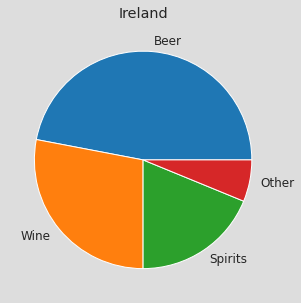

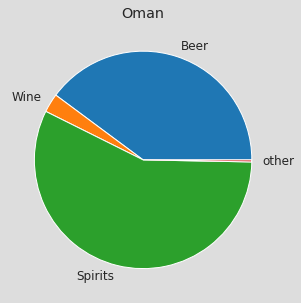

In [ ]:
data =[47.0,28.0,18.8,6.2]
labels = ['Beer','Wine','Spirits','Other']
plt.title('Ireland')   
plt.pie(data, labels = labels)
plt.show()

data_1 = [39.8,2.8,57,0.3]
labels_1 = ['Beer','Wine','Spirits','other']
plt.title('Oman')   
plt.pie(data_1, labels = labels_1)
plt.show()

For the above, We select two countries with similar population size. Their total consumption, however varies by a large amount owing to cultural and Religious factors. 

Surprisingly, Even when Oman consumes lesser alcohol. Its consumption of beer has a fairly large share in total consumption.   

Similar analyses can be done for other countries to ascertain factors that affect Alcohol consumption 

#### Q2: In what form is Alcohol consumed most in the world, how consistent is the consumption pattern across countries ? What are the top 10 countries that consume Beer?

In [ ]:
beer_sum = Alcohol_df.beer_consumption.sum()
wine_sum= Alcohol_df.wine_consumption.sum()
spirits_sum= Alcohol_df.spirits_consumption.sum()
other_sum= Alcohol_df.other_consumption.sum()
total = beer_sum+wine_sum+spirits_sum+other_sum
beer = (beer_sum*100)/total
wine = (wine_sum*100)/total
spirits = (spirits_sum*100)/total
other = (other_sum*100)/total

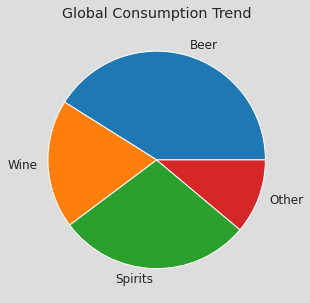

In [ ]:
data =[beer,wine,spirits,other]
labels = ['Beer','Wine','Spirits','Other']
plt.title('Global Consumption Trend')   
plt.pie(data, labels = labels)
plt.show()

The chart clearly depicts that Beer is the most popular Alcoholic Beverage consumed globally followed by wine.  

<AxesSubplot:title={'center':'Distribution of beer consumption'}, xlabel='beer_consumption'>

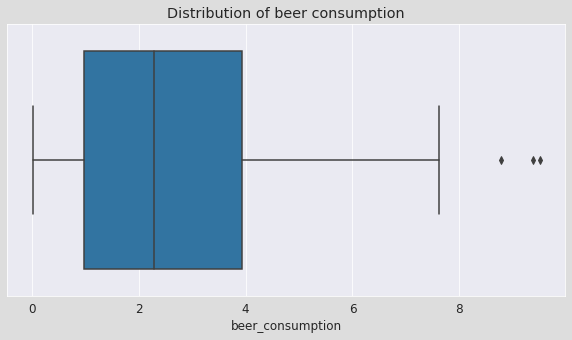

In [ ]:
plt.title('Distribution of beer consumption')
sns.boxplot(x = Alcohol_df.beer_consumption)

The three dots on the graph represent the outliers. The line in the box represents the Median consumption. 75% of countries consume beer between 0-4 litres while 25% fall in the range of 0-8.  

**Top 10 countries that consume beer**

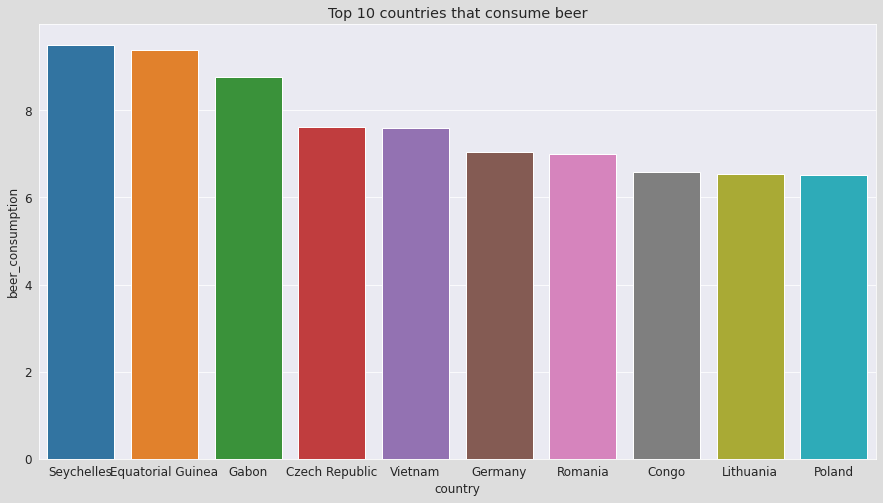

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 8)
Top10_df= Alcohol_df.sort_values(by='beer_consumption', ascending = False).head(10)
plt.title('Top 10 countries that consume beer')
sns.barplot(x=Top10_df.country, y =Top10_df.beer_consumption)
plt.show()

#### Q3: What is the ratio of Alcohol consumed as Beverage to that for other puposes?


In [ ]:
Total_beer_consumption = np.sum(Alcohol_df['beer_consumption'])
Total_wine_consumption= np.sum(Alcohol_df['wine_consumption'])
Total_other_consumption = np.sum(Alcohol_df['spirits_consumption'])+np.sum(Alcohol_df['other_consumption'])
Total_beverage = Total_beer_consumption + Total_wine_consumption
Total_global_consumption= np.sum(Alcohol_df['total_consumption'])

In [ ]:
Categorical_Ratio = Total_beverage/Total_other_consumption
Categorical_Ratio

1.5145315034993827

In [ ]:
Beverage =  Total_beverage*100/Total_global_consumption
Other = Total_other_consumption*100/Total_global_consumption

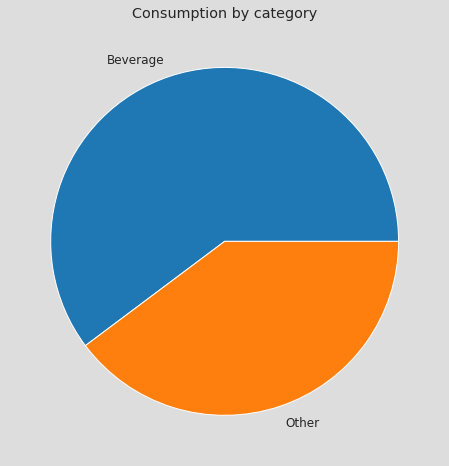

In [ ]:
data =[Beverage,Other]
labels = ['Beverage','Other']
plt.title('Consumption by category')   
plt.pie(data, labels = labels)
plt.show()

Amount of Alcohol used as a beverage is 1.5 times that of the amount used for other purposes including spirits. 

#### Q4: Which countries have the highest and lowest amount of unrecorded consumption? Is there a relationship between Unrecorded consumption and Beverage Consumption?


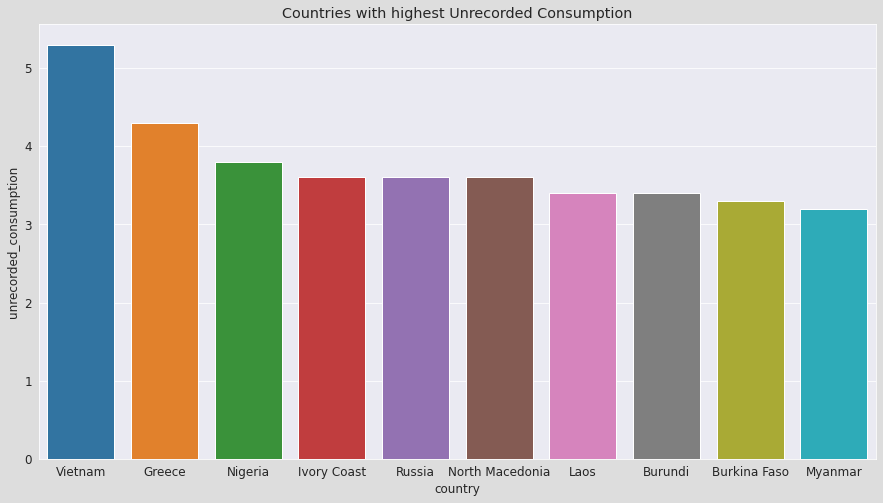

In [ ]:
plt.title('Countries with highest Unrecorded Consumption')
sns.barplot(x=Alcohol_df.sort_values(by ="unrecorded_consumption", ascending = False).head(10).country, y=Alcohol_df.sort_values(by ="unrecorded_consumption", ascending = False).head(10).unrecorded_consumption)
plt.show()

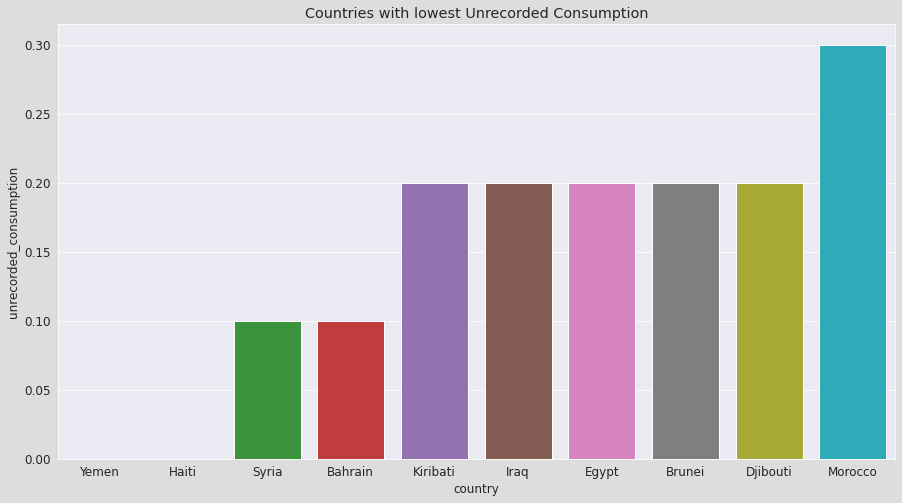

In [ ]:
plt.title('Countries with lowest Unrecorded Consumption')
sns.barplot(x=Alcohol_df.sort_values(by ="unrecorded_consumption").head(10).country, y=Alcohol_df.sort_values(by ="unrecorded_consumption").head(10).unrecorded_consumption)
plt.show()

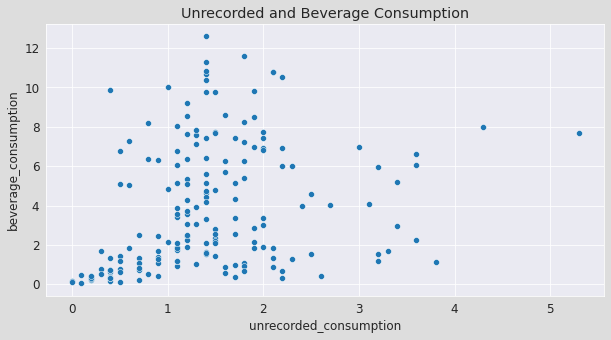

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.title('Unrecorded and Beverage Consumption')
sns.scatterplot(x = Alcohol_df['unrecorded_consumption'], y = Alcohol_df['beverage_consumption'])
plt.show()

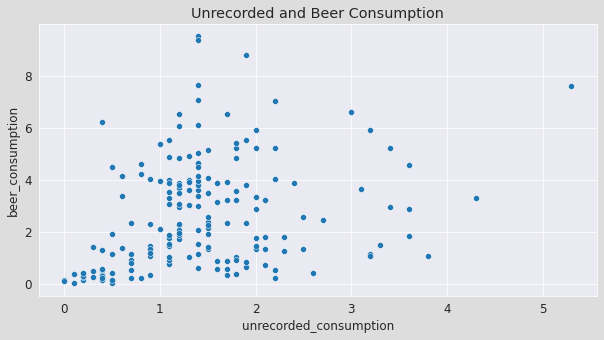

In [ ]:
plt.title('Unrecorded and Beer Consumption')
sns.scatterplot(x = Alcohol_df['unrecorded_consumption'], y = Alcohol_df['beer_consumption'])
plt.show()

There is a positive relationship between the amount of Alcohol Consumed as a beverage to that of unrecorded consumption. However, this may not depict a true picture because the beverage consumption in the table does not include beverage that was bought and consumed illegaly

#### Q5: Is there any relationship between unrecorded and Total Consumption? 

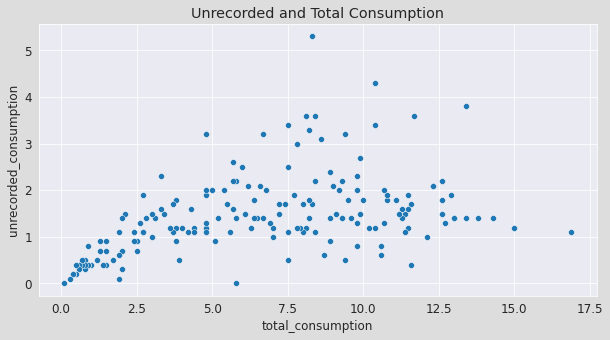

In [ ]:
plt.title('Unrecorded and Total Consumption')
sns.scatterplot(x = Alcohol_df['total_consumption'], y = Alcohol_df['unrecorded_consumption'])
plt.show()

As the total consumption increases the unrecorded consumption first increases than begins to decrease suggesting a quadratic relationship.

## Inferences and Conclusion

#### Inferences
- Although alcohol is used in various products, it's majorly consumed as a beverage.
- Beer is one of the most popular ways of consuming alcohol across the world.
- Consumption of Alcohol is highly influenced by the Cultural and Religious factors
- There is a positive relationship between beer consumption and Unrecorded consumption at lower levels of alcohol consumption which fades as level of beer consumption increases.
- As the total consumption increases the unrecorded consumption first increases than begins to decrease suggesting a quadratic relationship.

#### Conclusion
- Alcohol is one of the most controversial and necessary products that is produced and consumed throughout the world. A lot of countries ban the use of Alcohol as Beverage, however people still end up consuming it illegaly giving rise to a black Market. However, as the size of this black market increases, it becomes more and more difficult to sustain it. 
- Among alcoholic drinks, Beer is the most common drink. This could be because it is usually cheaper compared to othe drinks and also easily accessible. Countries like Yemen, Iraq etc have lower alcohol consumption then most European countries. 


## References and Future Work

### References:
- Python: https://www.w3schools.com/python/
- Matplotlib: https://www.geeksforgeeks.org/matplotlib-tutorial/
- Seaborn: https://seaborn.pydata.org/

### Future Work
- The analysis can be extended by specifying the continents and researching conumption patterns across continents.
- Further one can build a robust consumer behaviour model by analysing additional factors other than price, availabilty etc. that affect Alcohol like culture, Religion, Democracy Index etc using Dummy Regression
